# Learning Data Science from Scratch with Iris Classification Problem

Building a ML Model for Classifying iris flowers based on their length and widgth measurements of their petals and sepals

In [1]:
# gettting to know the location of the Iris Dataset to be used
import os
print(os.listdir("input"))

['Iris.csv']


### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("husl")
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the data usind pandas library
data = pd.read_csv("input/Iris.csv")

In [4]:
# Get the preview of the data
data.shape

(150, 6)

In [5]:
# view top 5
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# view bottom 5 
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# checking for any inconsistency in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Exploratory Data Analysis(EDA)

#### Get to know some statistical facts

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### Learn more from the categorical data

In [9]:
data["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Data Visualisation

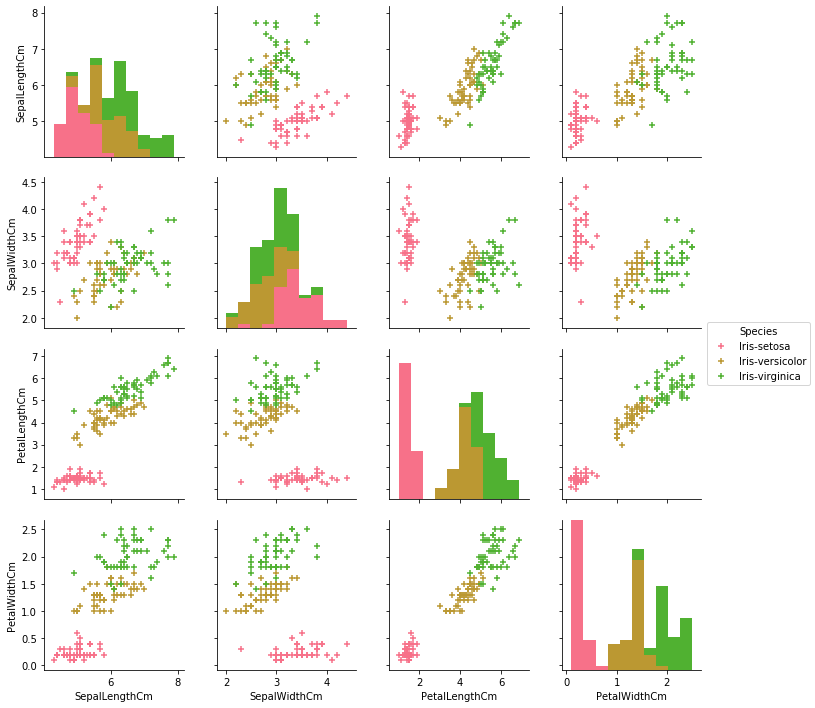

In [10]:
# drop the Id column
data1 = data.drop('Id', axis= 1)

g = sns.pairplot(data1, hue = 'Species', markers= '+')
plt.show()

#### Checking for the distribution of length and width

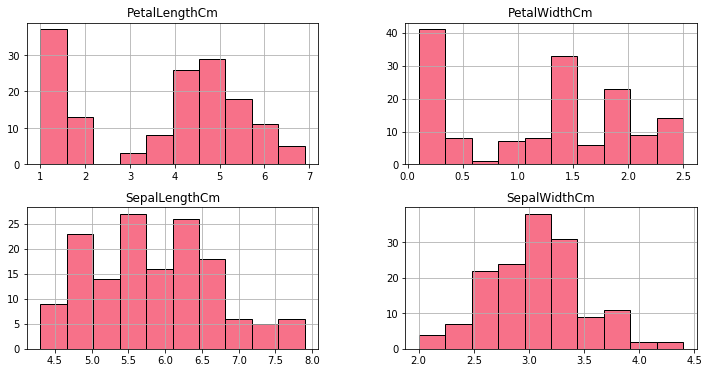

In [11]:
# using histogram to check for the distribution
data1.hist(edgecolor= "black")
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

#### Checking for the variations of length and width among the different Species

/usr/lib/python3/dist-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/lib/python3/dist-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<function matplotlib.pyplot.show(*args, **kw)>

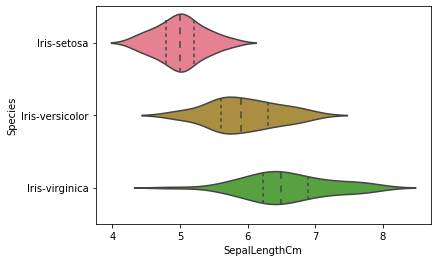

In [12]:
g = sns.violinplot(y = 'Species', x ='SepalLengthCm', data= data1, inner='quartile' )
plt.show




<function matplotlib.pyplot.show(*args, **kw)>

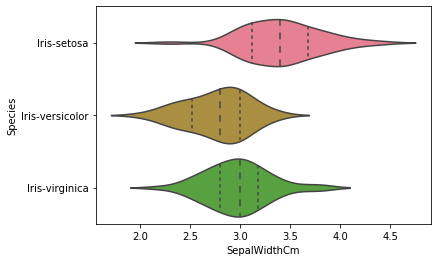

In [13]:
g = sns.violinplot(y = 'Species', x ='SepalWidthCm', data= data1, inner='quartile' )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

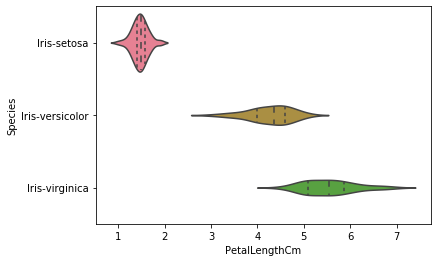

In [14]:
g = sns.violinplot(y = 'Species', x = 'PetalLengthCm', data= data1, inner='quartile' )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

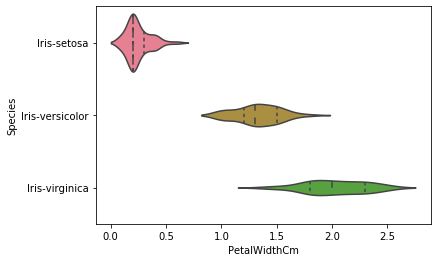

In [15]:
g = sns.violinplot(y = 'Species', x = 'PetalWidthCm', data= data1, inner='quartile' )
plt.show

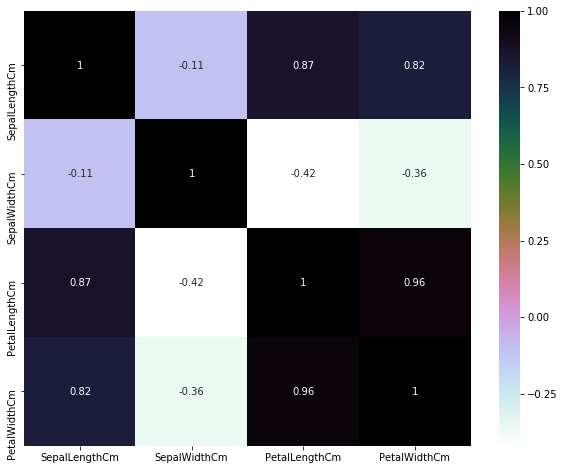

In [16]:
# drawing heatmap with input as the correlation matrix calculated as the data1.corr()
plt.figure(figsize =(10, 8))
sns.heatmap(data1.corr(), annot=True, cmap="cubehelix_r")
plt.show()

## Build Model with sckit-learn

### Splitting the training and test datasets
--> We'll have the attributes/features as X and target as y

In [17]:
X = data.drop(['Id', 'Species'], axis =1)
y = data['Species']

# Observe the different datasets of X and y
print(X.head())
print()
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


#### checking the train and test datasets

In [20]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8
121,5.6,2.8,4.9,2.0
144,6.7,3.3,5.7,2.5


In [21]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [22]:
y_train.head()

32         Iris-setosa
52     Iris-versicolor
70     Iris-versicolor
121     Iris-virginica
144     Iris-virginica
Name: Species, dtype: object

In [23]:
y_test.head()

87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
Name: Species, dtype: object

##### The classification algorithms used in this problem
1. Logistic Classification
2. Decision Tree
3. Support Vector Machine (SVM)
4. K-Nearest Neighbours

##### Importing necessary packages for the various classsification algorithms

In [24]:
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression  #for LogisticRegression
from sklearn.tree import DecisionTreeClassifier     #for DecisionTreeClassifier
from sklearn import svm         #for Support Vector Machine(SVM)
from sklearn.neighbors import KNeighborsClassifier #for k nearest neighbours
from sklearn import metrics # for checking the model accuracy

### Logistic Regression

In [25]:
logr = LogisticRegression(solver="liblinear" ,multi_class= 'auto')      # Creating the Logistic Regression Model
logr.fit(X_train, y_train)       # Training the model
y_pred = logr.predict(X_test)    # Making predictions from the X_test
acc_log  = metrics.accuracy_score(y_pred, y_test)  # checking the accuracy of the model
print(f"The accuracy of the Logistic Regression Model is {acc_log}")

The accuracy of the Logistic Regression Model is 0.8888888888888888


### Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_pred, y_test)
print(f"The accuracy of the Decision Tree Classifier model is {acc_dt}")

The accuracy of the Decision Tree Classifier model is 0.9777777777777777


### Support Vector Machine(SVM)

In [27]:
sv = svm.SVC(gamma="auto")
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
acc_sv = metrics.accuracy_score(y_pred, y_test)
print(f"The accuracy for the Support Vector classifier Model is {acc_sv}")

The accuracy for the Support Vector classifier Model is 1.0


### K-Nearest Neighbours

In [28]:
knc = KNeighborsClassifier(n_neighbors=3)  #examine 3 neighbours and put them in a class
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
acc_knc = metrics.accuracy_score(y_pred, y_test)
print("The accuracy of the K-nearest Neighbour classifier is ", acc_knc)

The accuracy of the K-nearest Neighbour classifier is  0.9777777777777777


Comparing the different models

In [29]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machines', 'K Nearest Neighbours', 'Decision Tree'],
    'Score' : [acc_log, acc_sv, acc_knc, acc_dt]
})
models.sort_values(by="Score", ascending=False)

,Model,Score
1,Support Vector Machines,1.000000
2,K Nearest Neighbours,0.977778
3,Decision Tree,0.977778
0,Logistic Regression,0.888889
